In [2]:
!pip install pandas numpy matplotlib


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("func_guess_data.csv")
x_points = data.iloc[:, 0].values
y_points = data.iloc[:, 1].values


In [5]:

basis_functions = [
    lambda x: x,
    lambda x: x**2,
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.exp(x)/100]

def serect_func(x, c, phi):
    return (c[0] * phi[0](x) + c[1]*phi[1](x) 
      + c[2]*phi[2](x) + c[3]*phi[3](x) 
      + c[4]*phi[4](x))

In [6]:
N = len(x_points)
M = len(basis_functions)

In [7]:
A = np.zeros((N, M))
for i in range(N):
    for j in range(M):
        A[i, j] = basis_functions[j](x_points[i])


In [8]:
c, _, _, _ = np.linalg.lstsq(A, y_points, rcond=None)
c_guess = np.rint(c).astype(int)

In [9]:
print("Coefficients:", c)
print("Rounded guess:", c_guess)


Coefficients: [ 3.03843693 -1.00637336 10.05692658 15.05271755  1.00269411]
Rounded guess: [ 3 -1 10 15  1]


In [10]:
def approx_func(x, c, phi):
    return sum(ci * phii(x) for ci, phii in zip(c, phi))

In [11]:
x_plot = np.linspace(min(x_points), max(x_points), 400)
y_plot = approx_func(x_plot, c, basis_functions)


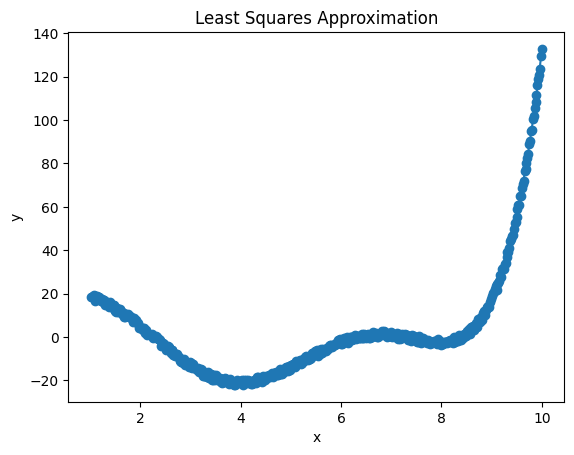

In [12]:
plt.scatter(x_points, y_points)
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Approximation")
plt.show()